# Dog Breed Identification
## Model Training

In [1]:
# Download the fast ai software
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
# Imports

# Fast AI
from fastai.vision import *
from fastai.metrics import error_rate

# Other key modules
from pathlib import Path
import numpy as np

# Jupyter magic commands
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# Link Google Drive to read and write files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Constants

BATCH_SIZE = 64
PATH = Path('/content/gdrive/My Drive/data/dog-breed-identification')
RANDOM_STATE = 194

In [0]:
# Read in the target labels
df = pd.read_csv(PATH/'labels.csv')
df['id'] = df['id'] + ".jpg"

In [0]:
np.random.seed(RANDOM_STATE)
data = ImageDataBunch.from_df(PATH, df=df, folder="train",
                              ds_tfms=get_transforms(),
                              size=299, bs=BATCH_SIZE//2,
                              valid_pct=0.2).normalize(imagenet_stats)

In [12]:
# Set up the model architecture

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 164546923.18it/s]


In [13]:
# Start training the model
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,accuracy,time
0,2.036606,0.993833,0.789139,24:35
1,0.907353,0.549212,0.837084,03:09
2,0.739973,0.545385,0.829256,03:06
3,0.714875,0.475971,0.849315,03:05
4,0.528190,0.474659,0.859589,03:04
5,0.501184,0.468816,0.861057,03:05
6,0.391642,0.454837,0.868395,03:04
7,0.363087,0.425969,0.870842,03:04
8,0.263372,0.429005,0.872798,03:04
9,0.241633,0.426293,0.872309,03:05


In [0]:
# Save Stage 1 
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


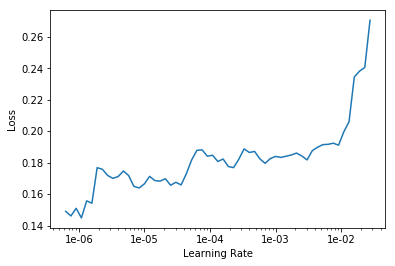

In [15]:
# Find an optimial learning rate
learn.lr_find()
learn.recorder.plot()

In [16]:
# Model fine tuning
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.184438,0.418043,0.877202,03:23
1,0.187272,0.422707,0.872309,03:17
2,0.168298,0.419432,0.876223,03:20
3,0.181275,0.420261,0.880137,03:18


In [0]:
# Save the model
learn.export()